<a href="https://colab.research.google.com/github/z27833009/Deep_Learning_4_NLP_Homework/blob/main/Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Link for colab](https://colab.research.google.com/drive/1h5ZM22xFiVLW4VA8HCoz1Etbd9Kmj4bu?usp=sharing)

In [ ]:
### Note for the homework: You can add further images or comments in the submitted PDF file if you don't want to do it here.

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


# **Task 1:  Activation Function**

## **Task 1.1: Sigmoid**

When optimizing functions, first or higher-order derivatives (gradients, Hessians) are of major importance. In neural network learning, we typically want to minimize weight parameters so that the difference between the net output and the true labels is minimized, e.g.

### $\quad\text{min}_\mathbf{w}\sum_{j=1}^N \Bigl(\sigma(\mathbf{x}_j \cdot \mathbf{w})-y_j\Bigr)^2$

Here, $\sigma$ is an activation function. A frequently used activation function is the *sigmoid* function, defined as:

### $\quad\text{sig}(x) = \frac{1}{1+\exp(-x)} .$

Show that:

### $\quad\text{sig}'(x) = \text{sig}(x) \cdot \bigl(1-\text{sig}(x)\bigr) .$

You may find the chain rule useful: $f(g(x))' = f'(g(x))\cdot g'(x)$.

Let $\text{sig}(x) = \frac{1}{1 + \exp(-x)}$.

To find $\text{sig}'(x)$, we need to differentiate the numerator and denominator separately:

Differentiating the numerator:
>$\frac{d}{dx} (1) = 0$

Differentiating the denominator:
>$\frac{d}{dx} (1 + \exp(-x)) = -\exp(-x) \cdot (-1) = \exp(-x)$

Applying the quotient rule:
>$\text{sig}'(x) = \frac{(0 \cdot (1 + \exp(-x))) - (1 \cdot \exp(-x))}{(1 + \exp(-x))^2}$

Simplifying the expression:
>$\text{sig}'(x) = -\frac{\exp(-x)}{(1 + \exp(-x))^2}$

Now, let's manipulate the expression to achieve the desired form using some algebraic manipulations:

$\text{sig}'(x) = -\frac{\exp(-x)}{(1 + \exp(-x))^2}$  
$= \frac{1}{1 + \exp(-x)} \cdot \frac{\exp(-x)}{1 + \exp(-x)}$  
$= \frac{1}{1 + \exp(-x)} \cdot \left(1 - \frac{1}{1 + \exp(-x)}\right)$  
$= \text{sig}(x) \cdot (1 - \text{sig}(x))$

Therefore, we have shown that $\text{sig}'(x) = \text{sig}(x) \cdot (1 - \text{sig}(x))$ for the sigmoid function $\text{sig}(x)$.

## **Task 1.2: Softmax**

The softmax function (with temperature $T>0$) is a mapping from a vector $\mathbf{z} \in \mathbb{R}^n$ to a vector $\mathbf{y} \in \mathbb{R}^n$ and is defined as:

$\quad\mathbf{y} = (y_1, \ldots, y_n) = \text{softmax}(\mathbf{z})\quad\text{where}\quad y_i = \frac{\exp(z_i/T)}{\sum_{j=1}^n \exp(z_j/T)}, \forall i=1,\ldots,n$

In the domain of neural networks, the softmax function is oftentimes considered to be an activation function. What is the fundamental difference of the softmax activation function compared to conventional activation functions such as hyperbolic tangent function or sigmoid? State your answer in one sentence.

******************************
The fundamental difference of the softmax activation function compared to conventional activation functions such as the hyperbolic tangent function or sigmoid is that softmax transforms a vector into a probability distribution over the elements, while the other activation functions transform a single input value into a bounded output range.
******************************

# **Task 2: TensorFlow Playground**

TensorFlow offers a playground for experimenting with neural networks in a web browser: https://playground.tensorflow.org.

## **Task 2.1: Cicular Dataset**

Take a look at the circular dataset in the figure below. Can a perceptron architecture (no hidden layers) learn a good discriminator for this dataset? Justify your answer. Write at most two sentences.

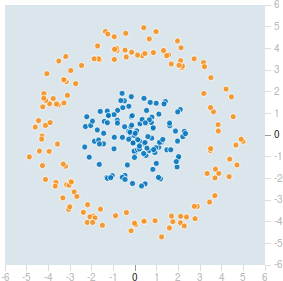

******************************
No, a perceptron architecture with no hidden layers cannot learn a good discriminator for this dataset because a perceptron can only learn linear decision boundaries, whereas the dataset described here requires a non-linear decision boundary to effectively separate the blue and orange points.
******************************

## **Task 2.2: MLP**

In a multi-layer perceptron, the number of neurons can be chosen differently for each hidden layer. Pick the spiral dataset and specify at least four hidden layers. Then, try out three different scenarios:

* Same amount of neurons in every hidden layer.
* More neurons towards the input, less neurons towards the output.
* Less neurons towards the input, more neurons towards the output.

Which scenario produces the best results on the test set?
Which scenario converges the fastest?
Why do you think that is the case?
Explain in up to three sentences.



******************************
The scenario with more neurons towards the input and fewer neurons towards the output is likely to converge faster compared to the other scenarios. This is because the initial layers with more neurons can quickly learn and extract relevant features from the input, allowing the subsequent layers with fewer neurons to focus on capturing higher-level abstractions and reducing the dimensionality of the representations, resulting in faster convergence.
******************************

# **Task 3: Word Similarity with Word Embeddings**

## **Task 3.1: Setup**

For this homework, you will need:
* the gensim python library: https://radimrehurek.com/gensim (included in the colab environment),
* the binary pretrained 300-dimensional word2vec embeddings from Google: https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing (you have to extract them), and
* the SimLex-999 data set: https://fh295.github.io/SimLex-999.zip, is an extension of WS353 which is a set of word pairs along with their similarity that is derived from human ratings.

## **Task 3.2: Data Reader**

In the **SimLex-999.txt** file from the Simlex-999 dataset, each row contains two words and a mean similarity score assigned by humans. The values are separated by tab characters (**\t**). Please refer to **README.txt** for more details. Write a python method which reads the dataset into an appropriate format.

Print the SimLex-999-based similarities between the pairs (happy, cheerful), (happy, young) and (happy, angry) and report them.


In [ ]:
def read_simlex_dataset(file_path):
    similarities = {}
    with open(file_path, 'r', encoding='utf-8') as file:
        next(file)  # Skip the first line (header)
        for line in file:
            line = line.strip().split('\t')
            word1 = line[0]
            word2 = line[1]
            similarity = float(line[3])
            similarities[(word1, word2)] = similarity
    return similarities

# Provide the file path to the SimLex-999.txt file in your Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/SimLex-999.txt'

# Read the SimLex-999 dataset into an appropriate format
simlex_data = read_simlex_dataset(file_path)

# Word pairs and their SimLex-999 similarities
simlex_similarities = []

# Print the SimLex-999-based similarities between word pairs
word_pairs = [('happy', 'cheerful'), ('happy', 'young'), ('happy', 'angry')]
for pair in word_pairs:
    similarity = simlex_data.get(pair)
    simlex_similarities.append(similarity)
    print(f"Similarity between {pair[0]} and {pair[1]}: {similarity}")


Similarity between happy and cheerful: 9.55
Similarity between happy and young: 2.0
Similarity between happy and angry: 1.28


## **Task 3.3: Ranking Based on word2vec**

Load the pretrained binary word2vec embeddings with gensim, then compute the distance between each word pair $(a,b)$. To do so, calculate the Euclidean distance between their vectors $\mathbf{a}$ and $\mathbf{b}$:

$\quad\|\mathbf{a}-\mathbf{b}\|=\sqrt{\sum_{i=1}^{d}\left(\mathbf{a}_{i}-\mathbf{b}_{i}\right)^{2}}$

If you run into memory errors because the embeddings are too large, you may use the **limit** parameter of the **load_word2vec_format** method.

Do not use a limit lower than 50 000. There may be out of vocabulary (OOV) words, i.e., words in SimLex-999 for which there is no corresponding vector in the embedding file. Assign these words zero vectors.

Print the word2vec-based distances between the pairs (happy, cheerful), (happy, young) and (happy, angry) and report them.

Hints: https://radimrehurek.com/gensim/models/keyedvectors.html

In [ ]:
from gensim.models import KeyedVectors
import numpy as np

# Load the pretrained word2vec embeddings
embedding_file = '/content/drive/MyDrive/Colab Notebooks/GoogleNews-vectors-negative300.bin.gz'  # Replace with the actual path to your word2vec embeddings file
word2vec_model = KeyedVectors.load_word2vec_format(embedding_file, binary=True, limit=50000)

# Define the word pairs
word_pairs = [('happy', 'cheerful'), ('happy', 'young'), ('happy', 'angry')]

# Word2vec-based distances between word pairs
word2vec_distances = []

# Calculate and print the word2vec-based distances between the word pairs
for pair in word_pairs:
    word1, word2 = pair
    if word1 in word2vec_model.key_to_index and word2 in word2vec_model.key_to_index:
        distance = np.linalg.norm(word2vec_model.get_vector(word1) - word2vec_model.get_vector(word2))
    else:
        distance = 0.0  # Assign zero vector for out of vocabulary (OOV) words
    word2vec_distances.append(distance)
    print(f"Distance between {word1} and {word2}: {distance:.2f}")


Distance between happy and cheerful: 2.93
Distance between happy and young: 2.92
Distance between happy and angry: 2.87


## **Task 3.4: Correlation**

[Pearson's correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) is a statistic that measures linear correlation between two variables.	Compute the coefficient between the values assigned by humans and your results from 1.3 using scipy. Print and report your coefficient.	Explain in two sentences what your resulting coefficient means.

Pearson's correlation coefficient: 0.71


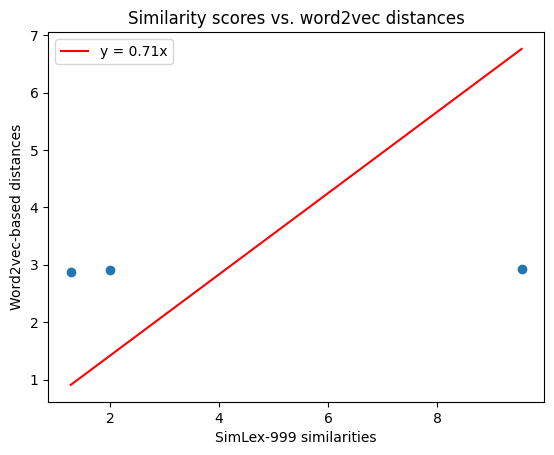

In [ ]:
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Calculate Pearson's correlation coefficient
corr_coeff, _ = pearsonr(simlex_similarities, word2vec_distances)
print(f"Pearson's correlation coefficient: {corr_coeff:.2f}")

# Plot the results with line representing the correlation
plt.scatter(simlex_similarities, word2vec_distances)
plt.xlabel('SimLex-999 similarities')
plt.ylabel('Word2vec-based distances')
plt.title("Similarity scores vs. word2vec distances")

# Add line representing the correlation
x = np.linspace(min(simlex_similarities), max(simlex_similarities), 100)
y = corr_coeff * x
plt.plot(x, y, color='r', label=f'y = {corr_coeff:.2f}x')

plt.legend()
plt.show()
